<a href="https://colab.research.google.com/github/Mansi-Kundariya/ML_Lab_Sem6/blob/main/CE059_ML_Lab11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Part A: Basic SVM with Linear Kernel**

In [ ]:
import sys,os
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
from pandas import DataFrame

In [ ]:
# importing scikit learn with make_blobs
from sklearn.datasets import make_blobs

In [ ]:
# creating datasets X containing n_samples
# Y containing two classes
X,Y = make_blobs(n_samples=100,centers=3,n_features=2);

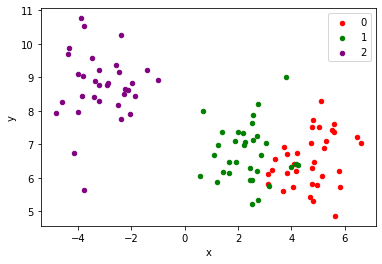

In [ ]:
# scatter plot, dots colored by class value
df = DataFrame(dict(x=X[:,0],y=X[:,1],label=Y))
colors = {0:'red',1:'green',2:'purple'}
fig,ax = plt.subplots()
grouped = df.groupby('label')
for key,group in grouped:
  group.plot(ax=ax, kind='scatter',x='x',y='y',label=key,color=colors[key])
plt.show()

In [ ]:
# Split data to train and test on 80-20 ratio
x_train, x_test, y_train,y_test = train_test_split(X,Y,test_size=0.2)
x_train

array([[ 5.6043735 ,  7.61378535],
       [ 5.51977576,  7.43302841],
       [-3.87982153, 10.76099787],
       [ 1.88006869,  7.09062908],
       [ 4.79418225,  7.50611141],
       [ 0.56937951,  6.0689971 ],
       [-4.13593897,  6.73470734],
       [ 3.97824351,  6.32430975],
       [-1.97524763,  8.83533928],
       [ 2.55732464,  7.12954937],
       [ 3.79435164,  8.99698742],
       [ 3.15986586,  5.7607527 ],
       [ 2.50944919,  5.23131931],
       [ 0.69229518,  7.98122638],
       [-3.22614667,  8.77549198],
       [ 3.38698483,  6.55070146],
       [-3.20412595,  9.21741719],
       [-4.82374491,  7.93803845],
       [ 3.2835692 ,  6.24735159],
       [ 3.12422178,  5.81940497],
       [ 3.74545799,  6.92057224],
       [-2.3793167 ,  7.75795287],
       [-2.56679849,  9.35449515],
       [ 1.44787437,  6.1774173 ],
       [-3.39583417,  8.40053566],
       [ 4.70429418,  5.42979106],
       [ 3.85147487,  6.69867701],
       [-2.39562319, 10.27303671],
       [ 1.21973651,

In [ ]:
 # Create a linear SVM classifier
from sklearn.svm import SVC

In [ ]:
clf = SVC(kernel='linear',C=0.1)

In [ ]:
clf.fit(x_train,y_train)

SVC(C=0.1, kernel='linear')

In [ ]:
# mode performance
from sklearn.metrics import accuracy_score
y_pred = clf.predict(x_test)
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))

Accuracy: 0.950


In [ ]:
...
# define bounds of the domain
min1, max1 = x_train[:, 0].min()-1, x_train[:, 0].max()+1
min2, max2 = x_train[:, 1].min()-1, x_train[:, 1].max()+1
h = (max1/min1)/100

In [ ]:
# define the x and y scale
x1grid = np.arange(min1, max1, 0.2)
x2grid = np.arange(min2, max2, 0.2)

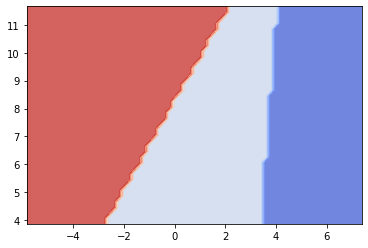

In [ ]:
# create all of the lines and rows of the grid
xx, yy = np.meshgrid(x1grid, x2grid)
plt.subplot(1,1,1)
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap = plt.cm.coolwarm, alpha = 0.8)


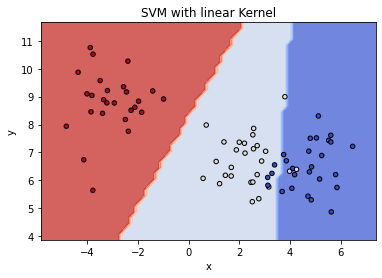

In [ ]:
# create all of the lines and rows of the grid
xx, yy = np.meshgrid(x1grid, x2grid)
plt.subplot(1,1,1)
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap = plt.cm.coolwarm, alpha = 0.8)
plt.scatter(x_train[:,0],x_train[:,1],c=y_train,cmap=plt.cm.coolwarm,s=20,edgecolors='k')
plt.xlabel("x")
plt.ylabel("y")
plt.xlim(xx.min(),xx.max())
plt.title('SVM with linear Kernel')
plt.show()

In [ ]:
def make_meshgrid(x, y, h=.02):
  x_min, x_max = x.min() - 1, x.max() + 1
  y_min, y_max = y.min() - 1, y.max() + 1
  xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
  return xx, yy


In [ ]:
def plot_contours(ax, clf, xx, yy, **params):
  Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)
  out = ax.contourf(xx, yy, Z, **params)
  return out


In [ ]:
# Make predictions on unseen test data
#clf_predictions = #############################
print("Accuracy: {}%".format(clf.score(x_test, y_test) * 100))

Accuracy: 95.0%


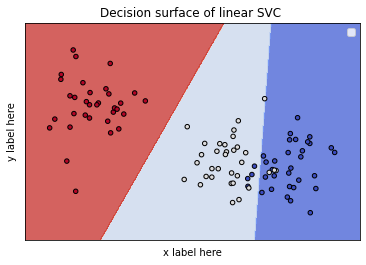

In [ ]:
fig, ax = plt.subplots()
# title for the plots
title = ('Decision surface of linear SVC ')
# Set-up grid for plotting.
X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)
plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=Y, cmap=plt.cm.coolwarm, s=20,edgecolors='k')
ax.set_ylabel('y label here')
ax.set_xlabel('x label here')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
ax.legend()
plt.show()


In [ ]:
# importing scikit learn with make_blobs
from sklearn.datasets import make_blobs
# creating datasets X containing n_samples
# Y containing two classes
X, Y = make_blobs(n_samples=100,n_features=2,centers=2)
print(X.shape)
print(Y)

(100, 2)
[1 1 1 0 0 1 1 0 0 1 1 0 0 0 1 0 1 1 1 1 0 0 0 0 0 0 0 1 1 0 0 1 0 0 1 1 0
 0 1 1 0 1 1 0 1 1 0 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 1 0 0 1 0 0 0 1 0 1 0 1
 1 0 0 1 1 0 1 1 0 0 1 1 0 0 1 1 1 0 0 1 0 0 0 0 0 1]


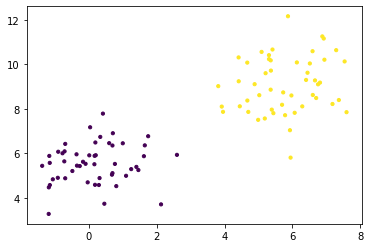

In [ ]:
# plotting scatters
plt.scatter(X[:,0],X[:,1],c=Y,s=10)

In [ ]:
# Split data to train and test on 80-20 ratio
X_train, X_test, y_train, y_test = train_test_split(X,Y, train_size=0.8)
print(X_train.shape)
print(X_test.shape)

(80, 2)
(20, 2)


In [ ]:
from sklearn import svm
# Create a linear SVM classifier
clf = svm.SVC(kernel='linear')
# Train classifier
clf.fit(X_train,y_train)

# # Plot decision function on training and test data
# plot_decision_function(X_train, y_train, X_test, y_test, clf)

SVC(kernel='linear')

In [ ]:
# Make predictions on unseen test data
clf_predictions = clf.predict(X_test)
print("Accuracy: {}%".format(clf.score(X_test, y_test) * 100 ))

Accuracy: 100.0%


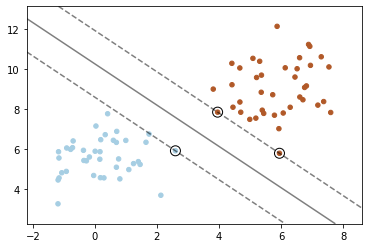

In [ ]:
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=20, cmap=plt.cm.Paired)
from sklearn.inspection import DecisionBoundaryDisplay
# plot the decision function
ax = plt.gca()
DecisionBoundaryDisplay.from_estimator(
    clf,
    X_train,
    plot_method="contour",
    colors="k",
    levels=[-1, 0, 1],
    alpha=0.5,
    linestyles=["--", "-", "--"],
    ax=ax,
)
# plot support vectors
ax.scatter(
    clf.support_vectors_[:, 0],
    clf.support_vectors_[:, 1],
    s=100,
    linewidth=1,
    facecolors="none",
    edgecolors="k",
)
plt.show()

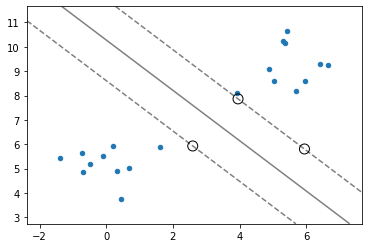

In [ ]:
plt.scatter(X_test[:, 0], X_test[:, 1], s=20, cmap=plt.cm.Paired)
from sklearn.inspection import DecisionBoundaryDisplay
# plot the decision function
ax = plt.gca()
DecisionBoundaryDisplay.from_estimator(
    clf,
    X_test,
    plot_method="contour",
    colors="k",
    levels=[-1, 0, 1],
    alpha=0.5,
    linestyles=["--", "-", "--"],
    ax=ax,
)
# plot support vectors
ax.scatter(
    clf.support_vectors_[:, 0],
    clf.support_vectors_[:, 1],
    s=100,
    linewidth=1,
    facecolors="none",
    edgecolors="k",
)
plt.show()

In [ ]:
print("Accuracy: {}%".format(clf.score(X_test, y_test) * 100))

Accuracy: 100.0%


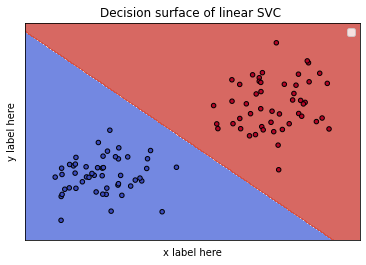

In [ ]:
ig, ax = plt.subplots()
# title for the plots
title = ('Decision surface of linear SVC ')
# Set-up grid for plotting.
X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)
plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)

5

ax.scatter(X0, X1, c=Y, cmap=plt.cm.coolwarm, s=20,edgecolors='k')
ax.set_ylabel('y label here')
ax.set_xlabel('x label here')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
ax.legend()
plt.show()

#Part B Breast Cancer Prediction

In [ ]:
#Import scikit-learn dataset library
from sklearn import datasets
#Load dataset
cancer = datasets.load_breast_cancer()

In [ ]:
import pandas as pd

In [ ]:
df = pd.DataFrame(cancer.data,columns=cancer.feature_names)
df['target'] = cancer.target
df.tail()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,1


In [ ]:
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [ ]:
cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

In [ ]:
cancer.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [ ]:
df.shape

(569, 31)

In [ ]:
cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

In [ ]:
X = pd.DataFrame(cancer.data,columns=cancer.feature_names)
Y = df['target']
Y

0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Name: target, Length: 569, dtype: int64

In [ ]:
import numpy as np # linear algebra
import pandas as pd 

import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import xgboost as xgb
from sklearn.model_selection import KFold
from IPython.display import HTML, display
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


In [ ]:
data = datasets.load_breast_cancer()
data = pd.DataFrame(cancer.data,columns=cancer.feature_names)
data['target'] = cancer.target
data.tail()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,1


In [ ]:
def data_checks(df: pd.DataFrame):
        """
        perform checks in the dataset

        args: 
            df (pd.DataFrame): the DataFrame which we are performing checks
        
        returns:
            dictionary of checks

        """
        checks = {
            "info":df.info(),
            "shape":df.shape,
            "uniqueness":df.apply(lambda x: len(x.unique())).sort_values(ascending=False).head(10),
            "missing_values":df.isnull().sum(),
            "duplicates":df.duplicated().sum(),
            "data_snapshot":df.head()

        }
        return checks
data_checks(data)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

{'info': None, 'shape': (569, 31), 'uniqueness': smoothness error           547
 fractal dimension error    545
 worst area                 544
 mean concave points        542
 compactness error          541
 radius error               540
 worst concavity            539
 mean area                  539
 mean concavity             537
 mean compactness           537
 dtype: int64, 'missing_values': mean radius                0
 mean texture               0
 mean perimeter             0
 mean area                  0
 mean smoothness            0
 mean compactness           0
 mean concavity             0
 mean concave points        0
 mean symmetry              0
 mean fractal dimension     0
 radius error               0
 texture error              0
 perimeter error            0
 area error                 0
 smoothness error           0
 compactness error          0
 concavity error            0
 concave points error       0
 symmetry error             0
 fractal dimension error    0


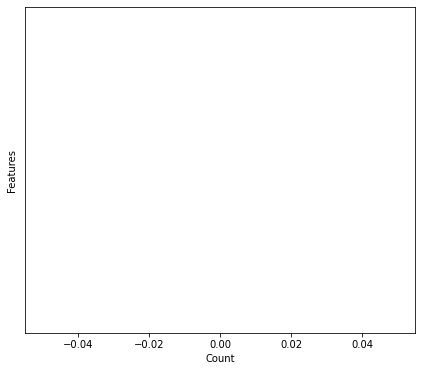

In [ ]:
def missing_value_analysis(data:pd.DataFrame):
    """
    this function is for performing analysis on missing values
    
    args:
        data (pd.DataFrame): input the dataframe to perform analysis upon
    
    return:
        returns a plot of all the missing value columns and their frequenct
    """
    cols_with_missing = data.isnull().sum()
    cols_with_missing = cols_with_missing[cols_with_missing>0]
    cols_with_missing.sort_values(inplace=True)
    fig, ax = plt.subplots(figsize=(7,6))  
    width = 0.70 # the width of the bars 
    ind = np.arange(len(cols_with_missing))  # the x locations for the groups
    ax.barh(ind, cols_with_missing, width, color="blue")
    ax.set_yticks(ind+width/2)
    ax.set_yticklabels(cols_with_missing.index, minor=False)
    plt.xlabel('Count')
    plt.ylabel('Features')
missing_value_analysis(data)

In [ ]:
# Get column names
col = data.columns
print(col)

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'target'],
      dtype='object')


In [ ]:
def get_xy(data:pd.DataFrame):
    """
    set the x and y column
    
    args:
        data(pd.DataFrame): the dataFrame which we are extracting the x and y
    
    returns:
        y and X in form of pandas series
    
    """
    y = cancer.target # M or B 
    X = pd.DataFrame(cancer.data,columns=cancer.feature_names)
    return y,X
y,X = get_xy(data)

In [ ]:
def describe_independent(X):
    """
    gets data subset to describe and performs simple descriptive measures
    on the independent variable
    
    args:
        X (pd.DataFrame): a subset of the main data
    
    returns:
        description in form of a dataframe
    """
    return X.describe().T.style.bar(subset=['mean'], color='#205ff2')\
                            .background_gradient(subset=['std'], cmap='Reds')\
                            .background_gradient(subset=['50%'], cmap='coolwarm')
describe_independent(X)

,count,mean,std,min,25%,50%,75%,max
mean radius,569.000000,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.110000
mean texture,569.000000,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.280000
mean perimeter,569.000000,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.500000
mean area,569.000000,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.000000
mean smoothness,569.000000,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.163400
mean compactness,569.000000,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.345400
mean concavity,569.000000,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.426800
mean concave points,569.000000,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.201200
mean symmetry,569.000000,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.304000
mean fractal dimension,569.000000,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.097440


In [ ]:
def describe_dependent(y):
    """
    gets the independent variable and performs simple descriptive measures, like counts
    
    args: 
        y (pd.DataFrame): y column of dependent variable
    
    returns:
        plot of counts of the dependent variable
    """
    ax = sns.countplot(y,label="Count")       # M = 212, B = 357
    B, M = y.value_counts()
    print('Number of Benign: ',B)
    print('Number of Malignant : ',M)
    ax.set_ylabel('Number of patients')
    bars = ax.patches
    half = int(len(bars)/2)
    left_bars = bars[:half]
    right_bars = bars[half:]
    for left, right in zip(left_bars, right_bars):
        height_l = left.get_height()
        height_r = right.get_height()
        total = height_l + height_r
        ax.text(left.get_x() + left.get_width()/2., height_l + 40, '{0:.0%}'.format(height_l/total), ha="center")
        ax.text(right.get_x() + right.get_width()/2., height_r + 40, '{0:.0%}'.format(height_r/total), ha="center")
describe_dependent(y)
